<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230116ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'mock_sales_data.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'bz_data_analyis.csv',
 'groceries.csv',
 '1_order_payments_dataset.csv',
 'sales_data_with_stores.csv',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales.csv',
 'online_retail.xlsx',
 'app_wau.csv',
 'online_retail_II.xlsx',
 'sample-sales-data.csv',
 'test.csv',
 'ab_experiment.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [4]:
df = pd.read_csv('app_wau.csv')
df.occurred_at = pd.to_datetime(df.occurred_at)
df['date'] = df.occurred_at.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['weekday'] = df['date'].dt.weekday
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4


In [5]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri


In [12]:
cnt_us = df[(df.location == 'United States') & (df.event_name == 'login')]
cnt_us = cnt_us[['user_id', 'date']].drop_duplicates().sort_values(['user_id', 'date'])
cnt_us.head()

,user_id,date
51711,11.0,2014-06-17
51721,11.0,2014-06-18
51731,11.0,2014-06-22
51745,11.0,2014-06-26
51775,11.0,2014-07-29


In [44]:
def get_ret(df) :

  list_nru = cnt_us.groupby(['user_id']).head(1)
  list_date = cnt_us['date'].sort_values().unique()

  res = list()

  for dates in list_date :

    temp_nru = list_nru[list_nru['date'] == dates]
    temp_au = df[df['user_id'].isin(temp_nru['user_id'])]

    temp_au['day'] = df[['date']].apply(lambda x : x - dates)
    temp_au['day'] = temp_au['day'].dt.days

    temp = temp_au.groupby(['day'])['user_id'].count().reset_index().rename(columns = {'user_id':'au'}).sort_values(['day'])
    temp['ratio'] = temp[['au']].apply(lambda x : round(x/x.max() * 100,2))
    temp['nru_date'] = str(dates)[0:10]
    temp = temp[['nru_date', 'day', 'ratio']]
    res.append(temp)

  res = pd.concat(res).reset_index().drop(['index'], axis = 1)

  return res


In [46]:
cnt_us = get_ret(cnt_us)
cnt_us.head()

<ipython-input-44-d6dcfda9b467>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-44-d6dcfda9b467>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nru_date,day,ratio
0,2014-05-01,0,100.00
1,2014-05-01,1,25.58
2,2014-05-01,2,16.28
3,2014-05-01,3,6.98
4,2014-05-01,4,22.09


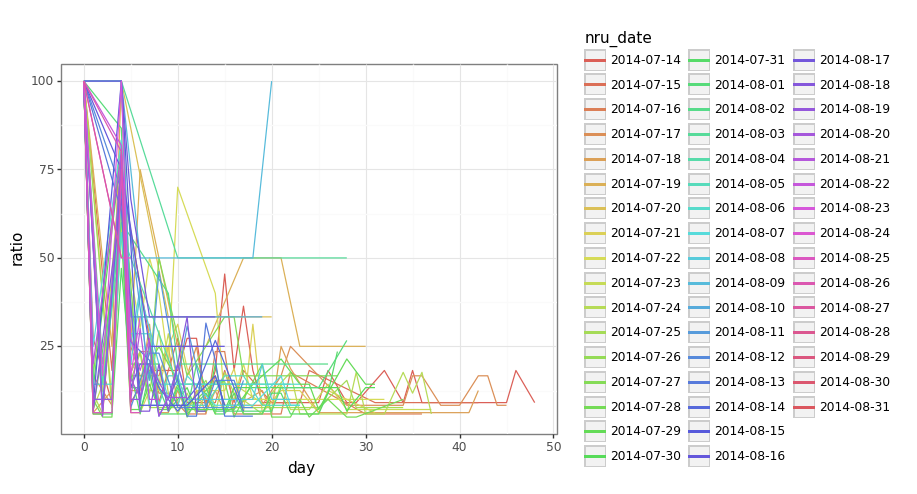

<ggplot: (8786830192403)>

In [49]:
(
    ggplot(cnt_us[cnt_us['nru_date'] >= '2014-07-14'], aes('day', 'ratio', color = 'nru_date')) +
    gg.geom_line() +
    gg.theme_bw()
)

# Iterators

In [50]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [51]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}